In [1]:
!gdown 1FE4urheZKKeaTlJfN5uHVBAY3Zc9DTl_

Downloading...
From: https://drive.google.com/uc?id=1FE4urheZKKeaTlJfN5uHVBAY3Zc9DTl_
To: /content/noise_experiment.npz
100% 8.91M/8.91M [00:00<00:00, 56.1MB/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
data = np.load('noise_experiment.npz')

In [4]:
data['random_noise'].shape, data['eps_t'].shape

((225, 150, 3), (10, 225, 150, 3))

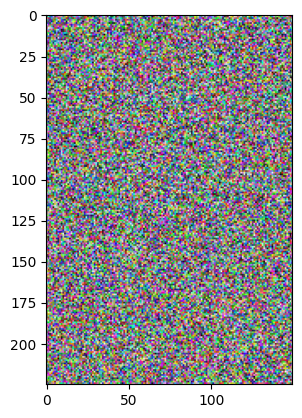

In [5]:
x_10 = data['random_noise']

plt.imshow(x_10.clip(0,1))
plt.show()

In [ ]:
# x_10 = np.random.randn(*x_10.shape)

In [6]:
eps = data['eps_t']
eps.shape

(10, 225, 150, 3)

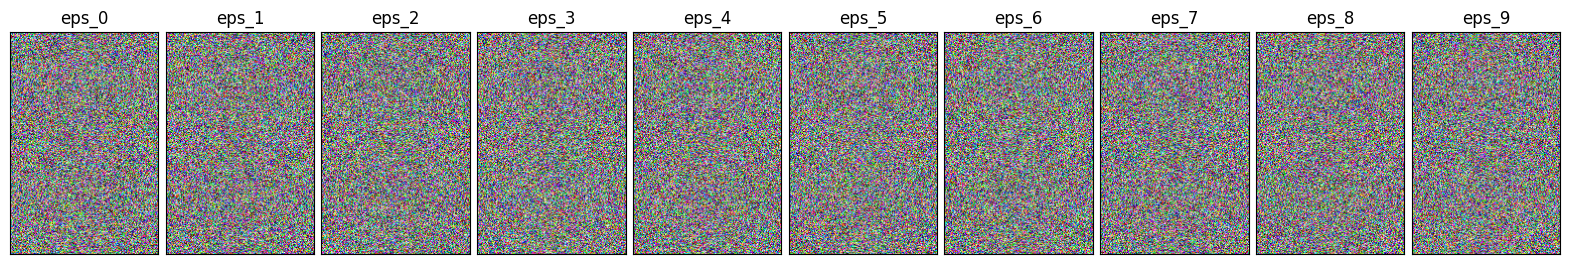

In [7]:
fig, ax = plt.subplots(1,10, figsize=(20, 5))

for t in range(10):
    ax[t].imshow(eps[t].clip(0,1))

    ax[t].set_xticks([]); ax[t].set_yticks([])
    ax[t].set_title(f"eps_{t}")

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

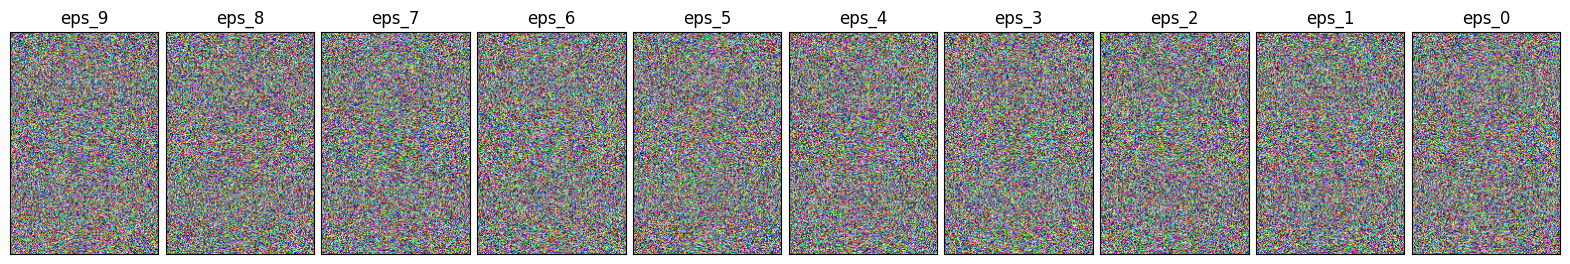

In [8]:
# reverse eps
fig, ax = plt.subplots(1,10, figsize=(20, 5))

for t in range(10):
    ax[t].imshow(eps[::-1][t].clip(0,1))

    ax[t].set_xticks([]); ax[t].set_yticks([])
    ax[t].set_title(f"eps_{9-t}")

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

## Noise Schedule

In [9]:
beta_1 = 1e-2
beta_T = 0.99
T = 10

beta = np.concatenate( (np.array([0.]), np.linspace(beta_1, beta_T, T)) )
alpha = 1 - beta
alpha_bar = np.exp( np.cumsum(np.log(alpha)) )

alpha_bar.shape, alpha_bar[0], alpha_bar[1], alpha_bar[-1], beta[1], beta[-1], alpha[1], alpha[-1],

((11,),
 1.0,
 0.99,
 1.0063582879294786e-05,
 0.01,
 0.99,
 0.99,
 0.010000000000000009)

In [10]:
gen_x = [ x_10 ]

for t in range(1, T+1): # 1~10
    # print(t)
    alpha_bar_t = alpha_bar[-t]

    # 이미지를 노이지하기 만들때 사용한 노이즈
    # 실제로는 알 수 없고 노이지한 x_t로 부터 예측해야 함
    eps_t = eps[-t]
    x_t = gen_x[-1]

    x_t_1 = ( (x_t - (1-alpha_bar_t) * eps_t) / np.sqrt(alpha_bar_t) )
    gen_x.append(x_t_1)

len(gen_x)

11

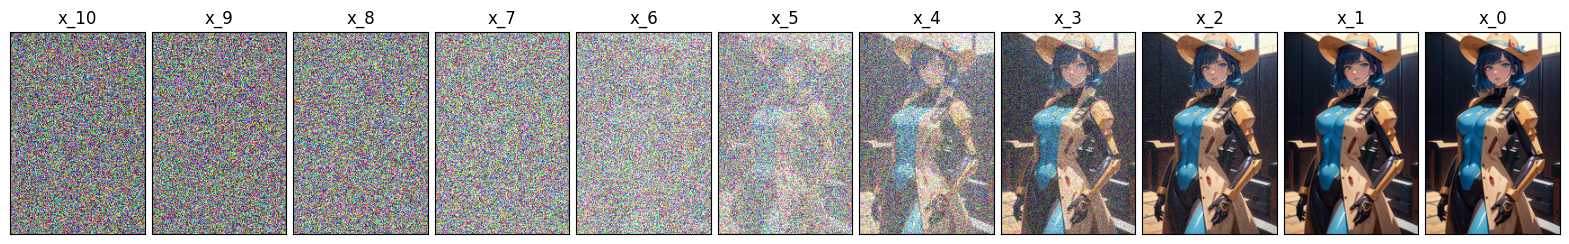

In [11]:
fig, ax = plt.subplots(1, T+1, figsize=(20, 5))

for t in range(T+1):
    ax[t].imshow(gen_x[t].clip(0,1))

    ax[t].set_xticks([]); ax[t].set_yticks([])
    ax[t].set_title(f"x_{T-t}")

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()

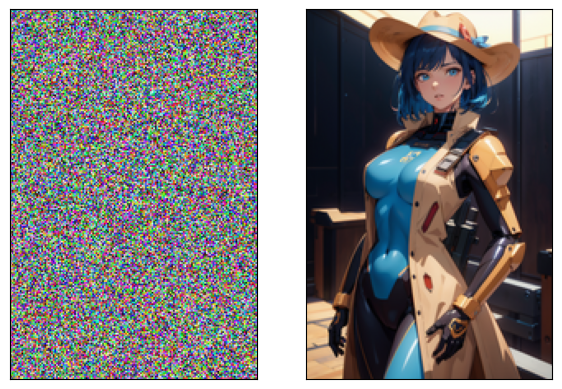

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(7,5))

ax[0].imshow(gen_x[0].clip(0,1))
ax[0].set_xticks([]); ax[0].set_yticks([])
ax[1].imshow(gen_x[-1].clip(0,1))
ax[1].set_xticks([]); ax[1].set_yticks([])

plt.show()